# Basic Error Correction Codes

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')    # Use dark background for plots

import qibo
assert qibo.__version__ >= "0.2.20", "This script requires qibo version 0.2.20 or higher."
from qibo import Circuit
from qibo.gates import H,CZ,X,M

from qibo.ui import plot_circuit, plot_density_hist, visualize_state


custom_style = {                    # Define a custom style for the circuit plot
    "facecolor" : "#000000",
    "edgecolor" : "#ffffff",
    "linecolor" : "#ffffff",
    "textcolor" : "#ffffff",
    "fillcolor" : "#c41b1b",
    "gatecolor" : "#9000ff",
    "controlcolor" : "#360000"
}

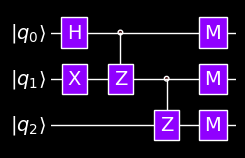

In [ ]:
def bit_blip_circuit(error_position: int = None) -> Circuit:
    """Creates a 3-qubit bit-flip error correction circuit."""

    circuit = Circuit(3)
    
    if error_position is not None:
        if error_position not in [0, 1, 2]:
            raise ValueError("error_position must be 0, 1, or 2")
        # Introduce a bit-flip error (X gate) on the specified qubit
        circuit.add(X(error_position))

    

    circuit.add(H(0))
    circuit.add(CZ(0, 1))
    circuit.add(CZ(1, 2))
    circuit.add(M(0, 1, 2))

    return circuit

plot_circuit(bit_blip_circuit(1), style=custom_style)  # Plot the circuit with custom style
plt.show()